In [1]:
import pandas as pd

df = pd.read_csv('AB_NYC_2019.csv')

In [2]:
print(df.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
print(df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [5]:
# Fill missing 'reviews_per_month' with 0
df.fillna({'reviews_per_month': 0}, inplace=True)

# Drop the 'last_review' column as it's not essential for our initial analysis
df.drop('last_review', axis=1, inplace=True)

# Drop the rows where 'name' or 'host_name' is missing
df.dropna(subset=['name', 'host_name'], inplace=True)

In [6]:
print(df.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [7]:
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  4.885800e+04  4.885800e+04  48858.000000  48858.000000  48858.000000   
mean   1.902335e+07  6.763169e+07     40.728941    -73.952170    152.740309   
std    1.098289e+07  7.862389e+07      0.054528      0.046159    240.232386   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.475980e+06  7.818669e+06     40.690090    -73.983070     69.000000   
50%    1.969114e+07  3.079133e+07     40.723070    -73.955680    106.000000   
75%    2.915765e+07  1.074344e+08     40.763107    -73.936280    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48858.000000       48858.000000       48858.000000   
mean         7.012444          23.273098           1.091124   
std         20.019757          44.549898           1.597270   
min          1.000000           0.00

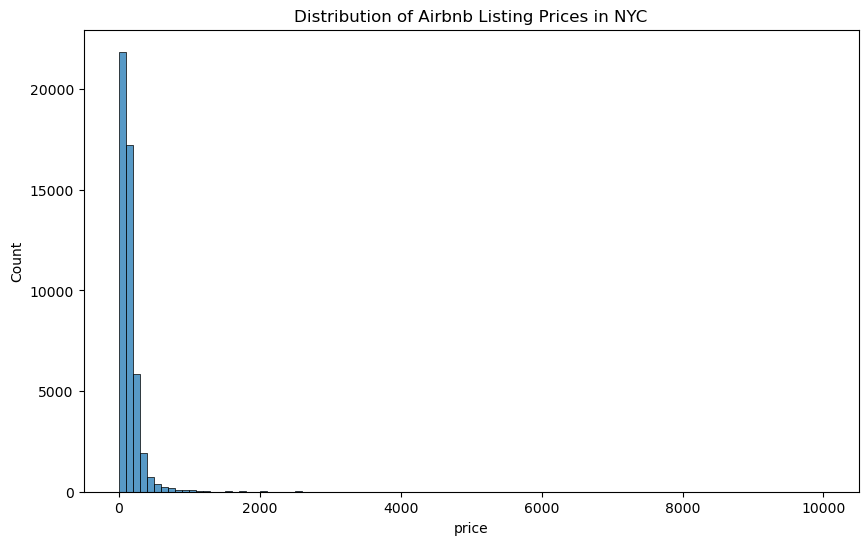

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for our plot
plt.figure(figsize=(10, 6))

# Create a histogram of the 'price' column
sns.histplot(df['price'], bins=100) # 'bins' is the number of bars

# Add a title to our plot
plt.title('Distribution of Airbnb Listing Prices in NYC')

# Show the plot
plt.show()

In [9]:
# Calculate the 99th percentile of the price
p99 = df['price'].quantile(0.99)
print(f"The 99th percentile for price is: ${p99:.2f}")

# Create a new DataFrame that excludes the top 1% of prices
df_filtered = df[df['price'] <= p99]

The 99th percentile for price is: $799.00


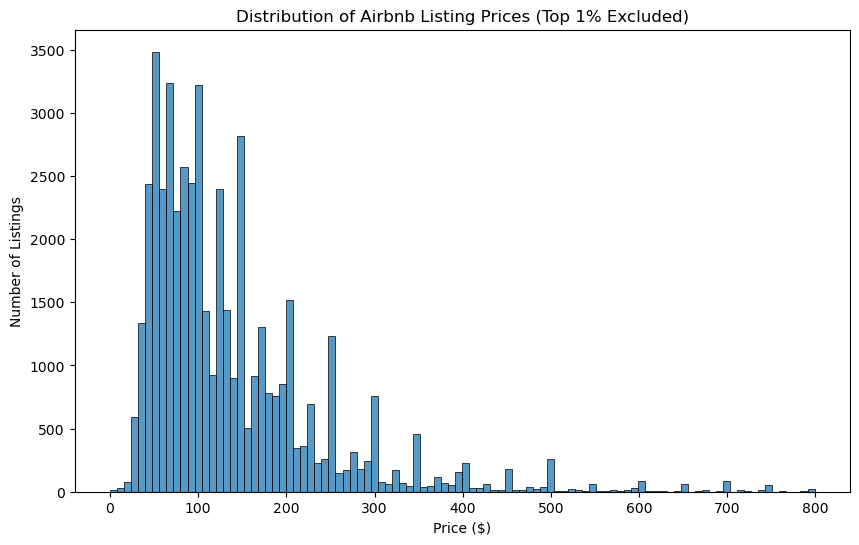

In [10]:
# Set the figure size for our plot
plt.figure(figsize=(10, 6))

# Create a histogram of the 'price' column from the FILTERED data
sns.histplot(df_filtered['price'], bins=100) # Using df_filtered

# Add a title to our plot
plt.title('Distribution of Airbnb Listing Prices (Top 1% Excluded)')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')

# Show the plot
plt.show()

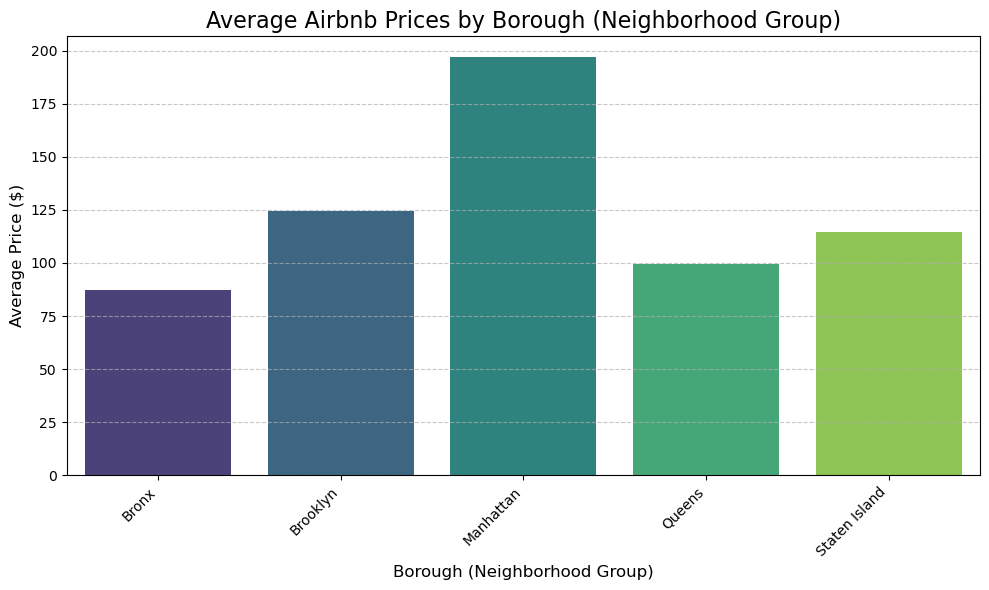

In [13]:
# First, create the average_prices DataFrame
# Assuming you have a DataFrame called 'df' with columns 'neighbourhood_group' and 'price'
average_prices = df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Create a bar chart to visualize the average price differences
plt.figure(figsize=(10, 6)) # Set the figure size for better readability

# Updated barplot to address the FutureWarning
sns.barplot(x='neighbourhood_group', y='price', hue='neighbourhood_group', data=average_prices, 
            palette='viridis', legend=False)  # Added hue and legend=False

# Add titles and labels for clarity
plt.title('Average Airbnb Prices by Borough (Neighborhood Group)', fontsize=16)
plt.xlabel('Borough (Neighborhood Group)', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right') # 'ha' stands for horizontal alignment

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

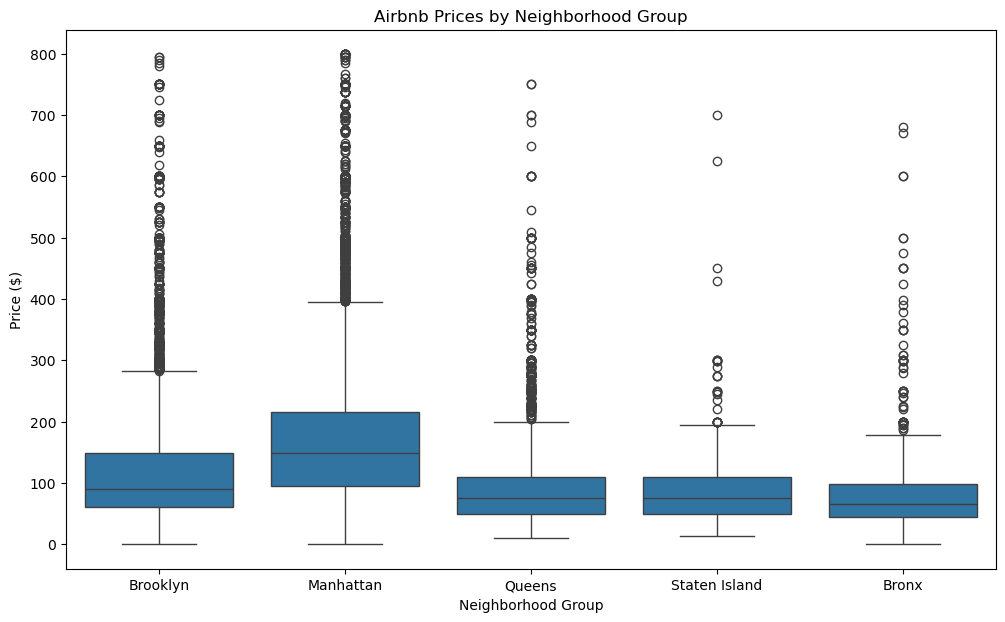

In [11]:
plt.figure(figsize=(12, 7))

# Create a boxplot to compare price distribution across neighbourhood_group
sns.boxplot(x='neighbourhood_group', y='price', data=df_filtered)

plt.title('Airbnb Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price ($)')

plt.show()

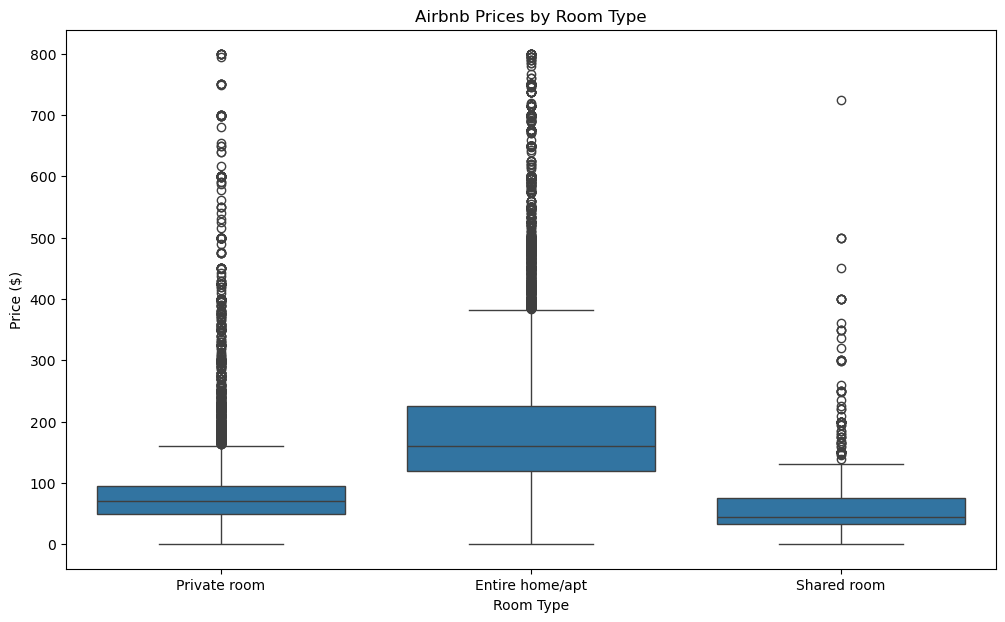

In [12]:
plt.figure(figsize=(12, 7))

# Create a boxplot to compare price distribution across room_type
sns.boxplot(x='room_type', y='price', data=df_filtered)

plt.title('Airbnb Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')

plt.show()

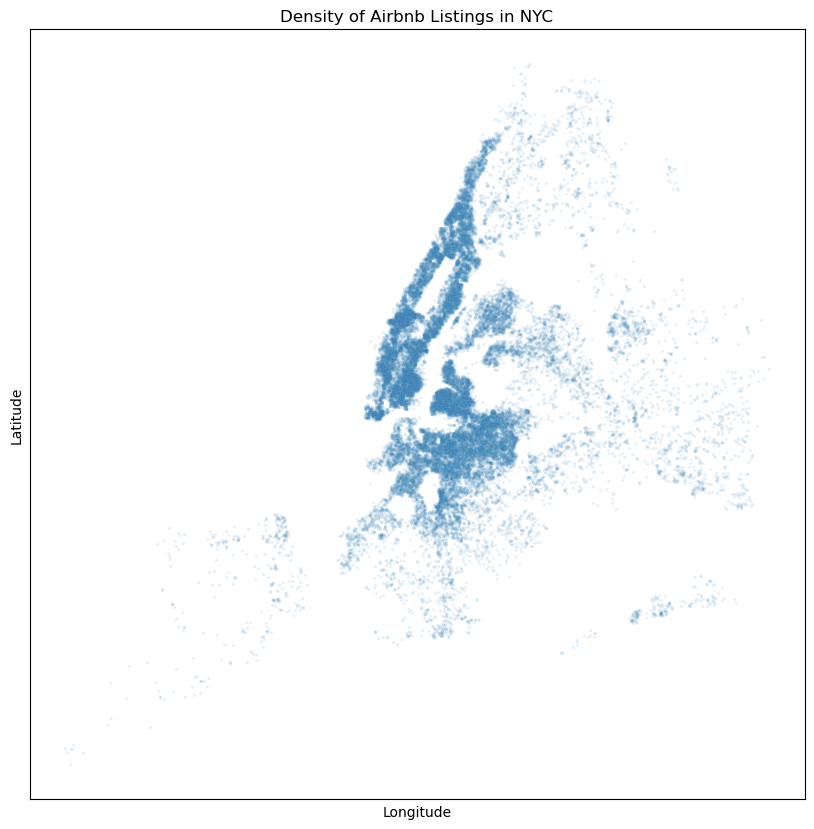

In [13]:
# Set the size of the plot
plt.figure(figsize=(10, 10))

# Create a scatter plot. `alpha` makes the dots transparent to show density.
# `s` makes the dots smaller so the plot is cleaner.
sns.scatterplot(x='longitude', y='latitude', data=df_filtered, alpha=0.1, s=5)

plt.title('Density of Airbnb Listings in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# We can remove the axis ticks for a cleaner, more map-like look
plt.xticks([])
plt.yticks([])

plt.show()

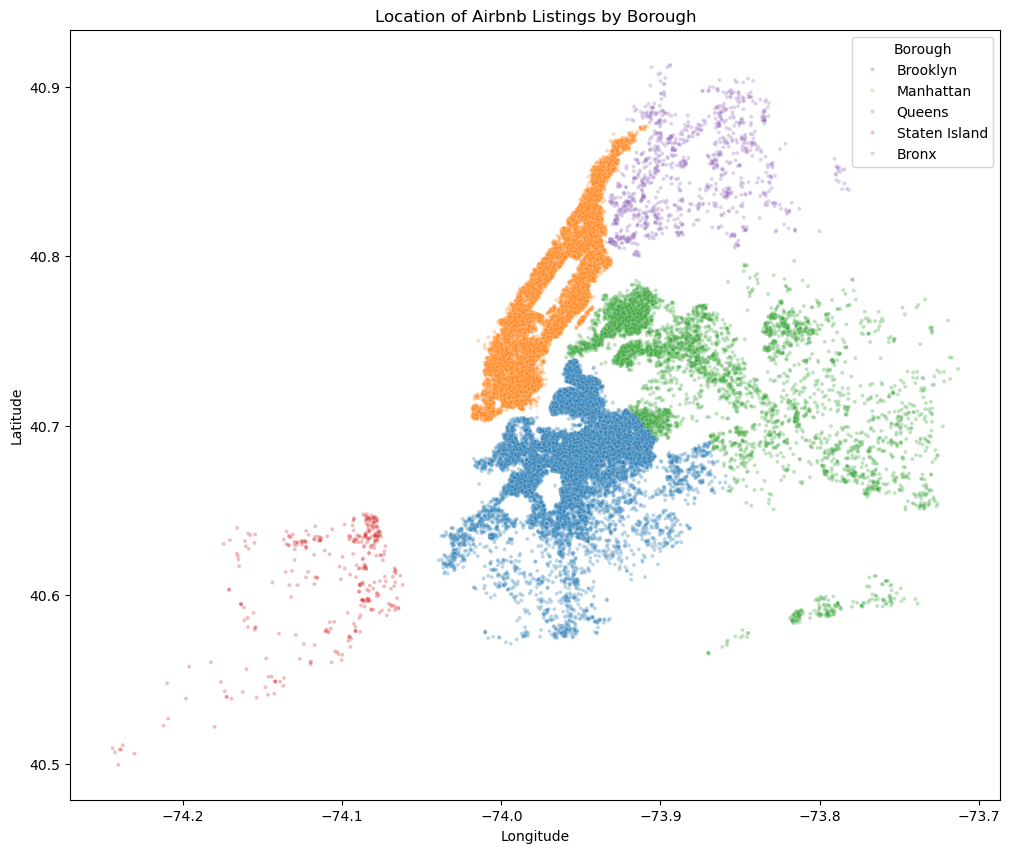

In [14]:
# Set the size of the plot
plt.figure(figsize=(12, 10))

# Use 'hue' to color the points based on the 'neighbourhood_group' column
sns.scatterplot(x='longitude', y='latitude', data=df_filtered, hue='neighbourhood_group', alpha=0.3, s=8)

plt.title('Location of Airbnb Listings by Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Borough') # Adds a legend to explain the colors

plt.show()

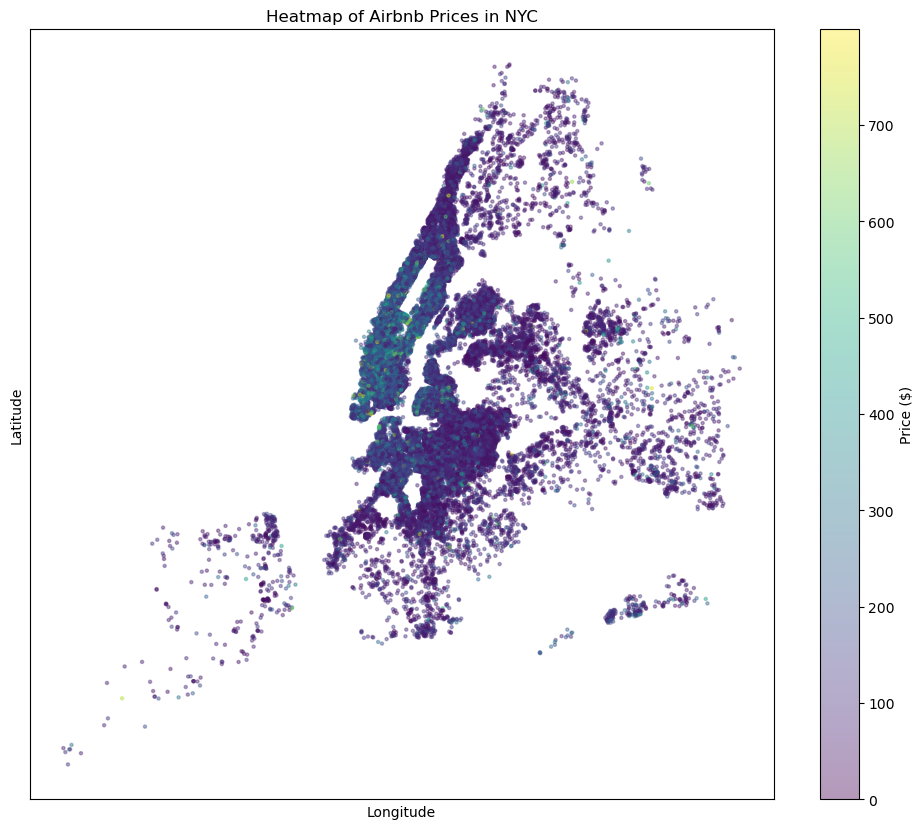

In [15]:
# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a scatter plot where the color `c` is determined by the price
# `cmap` is the color map we use. 'viridis' or 'plasma' are great choices.
plt.scatter(df_filtered['longitude'], df_filtered['latitude'], 
            c=df_filtered['price'], cmap='viridis', 
            alpha=0.4, s=5)

# Add a color bar to the side that serves as a legend for the prices
plt.colorbar(label='Price ($)')

plt.title('Heatmap of Airbnb Prices in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks([])
plt.yticks([])

plt.show()

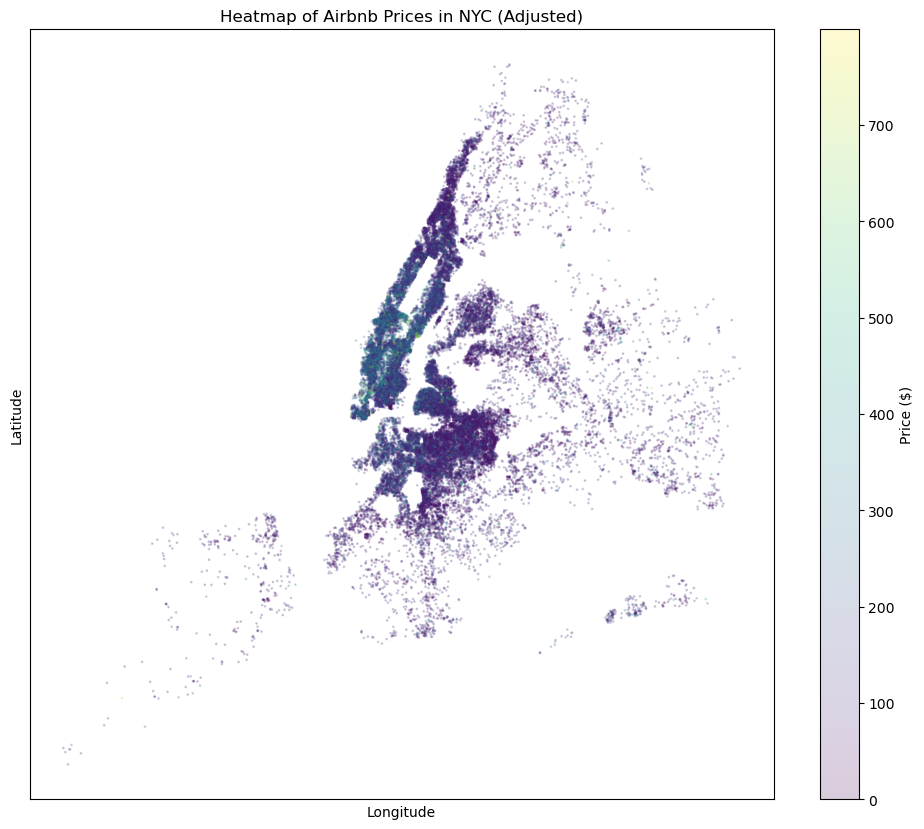

In [16]:
plt.figure(figsize=(12, 10))

# Make the dots much smaller (s=1) and more transparent (alpha=0.2)
plt.scatter(df_filtered['longitude'], df_filtered['latitude'],
            c=df_filtered['price'], cmap='viridis',
            alpha=0.2, s=1) # <-- Adjusted values

plt.colorbar(label='Price ($)')
plt.title('Heatmap of Airbnb Prices in NYC (Adjusted)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks([])
plt.yticks([])

plt.show()

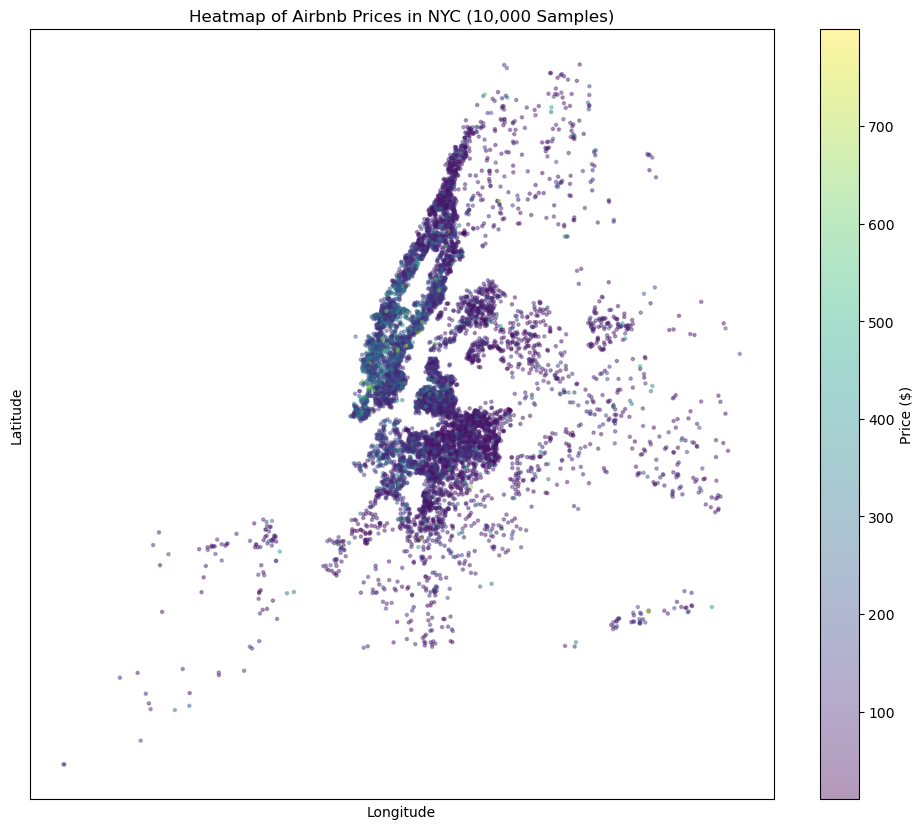

In [17]:
# Create a random sample of 10,000 listings
# random_state=42 ensures you get the same "random" sample every time you run it
df_sample = df_filtered.sample(n=10000, random_state=42)

plt.figure(figsize=(12, 10))

# Plot the SAMPLE instead of the full dataframe
plt.scatter(df_sample['longitude'], df_sample['latitude'],
            c=df_sample['price'], cmap='viridis',
            alpha=0.4, s=5)

plt.colorbar(label='Price ($)')
plt.title('Heatmap of Airbnb Prices in NYC (10,000 Samples)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks([])
plt.yticks([])

plt.show()

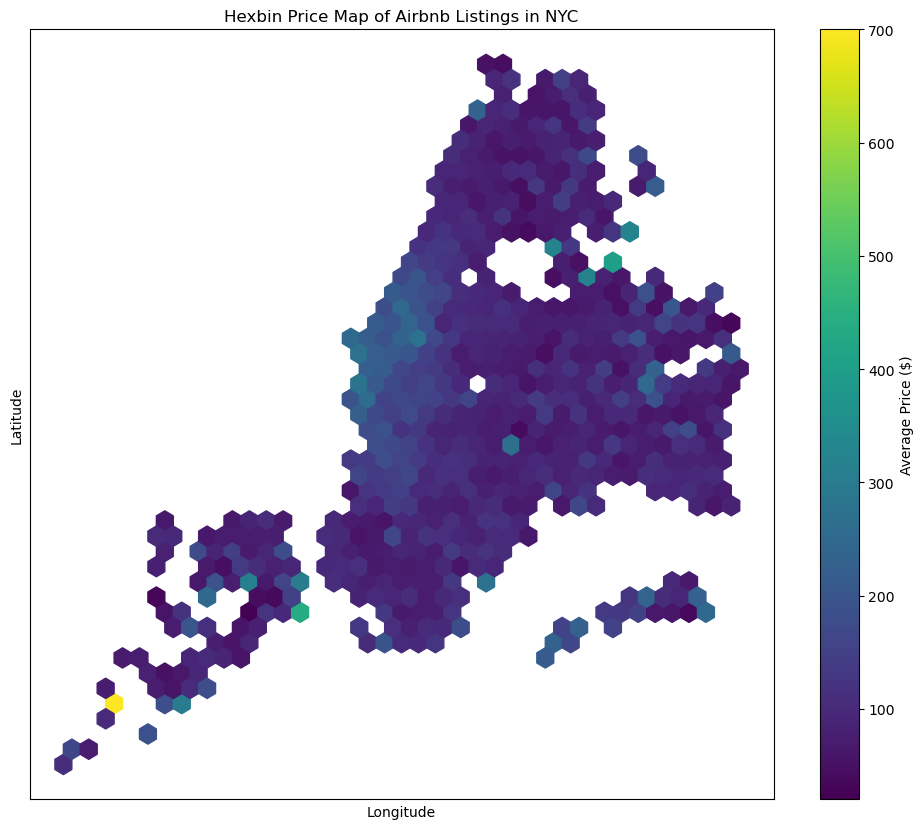

In [18]:
import numpy as np # We need numpy for the 'mean' function

plt.figure(figsize=(12, 10))

# Create a hexbin plot
# gridsize controls how many hexagons are in the grid (higher means smaller hexagons)
# C is the value to aggregate (price)
# reduce_C_function tells it HOW to aggregate (we want the average/mean price)
plt.hexbin(df_filtered['longitude'], df_filtered['latitude'],
           C=df_filtered['price'], gridsize=40,
           cmap='viridis', reduce_C_function=np.mean)

plt.colorbar(label='Average Price ($)')
plt.title('Hexbin Price Map of Airbnb Listings in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks([])
plt.yticks([])

plt.show()

In [19]:
# Create an explicit copy of the DataFrame
df_filtered = df_filtered.copy()
# 1. Define the boundaries (bins) and labels for our new categories.
# We'll categorize as: Not Available (0), Low (1-60 days), Medium (61-200 days), High (201-365 days)
bins = [-1, 0, 60, 200, 366]
labels = ['Not Available', 'Low', 'Medium', 'High']

# 2. Create the new 'availability_category' column.
# The `pd.cut` function segments and sorts data values into bins.
df_filtered['availability_category'] = pd.cut(df_filtered['availability_365'], bins=bins, labels=labels)

# 3. Check the distribution of our new categories to see how many listings fall into each.
print("Count of listings by availability category:")
print(df_filtered['availability_category'].value_counts())

Count of listings by availability category:
availability_category
Not Available    17390
High             13100
Medium            9667
Low               8227
Name: count, dtype: int64


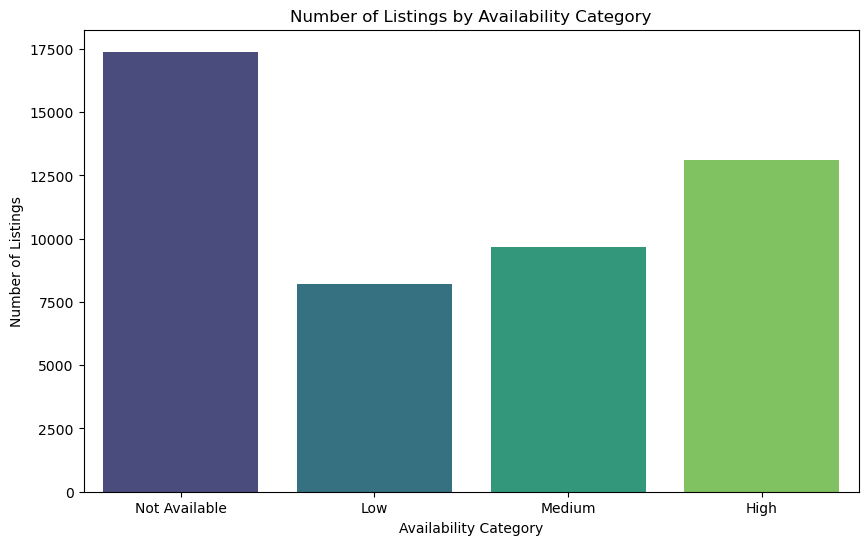

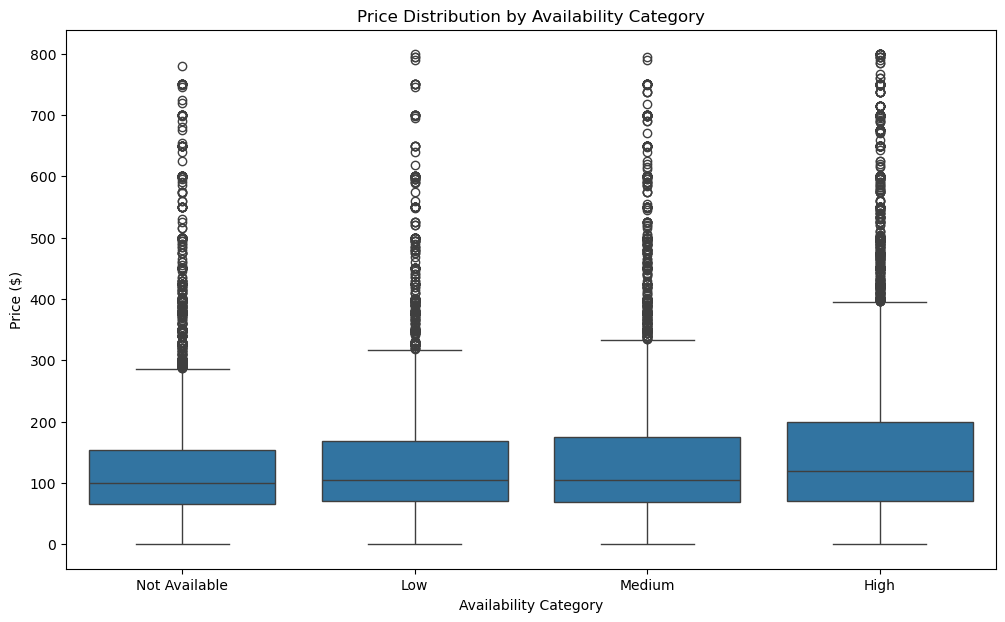

In [20]:
# Plot A: See how many listings are in each category
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_filtered, 
    x='availability_category', 
    hue='availability_category',  # Set hue to the same variable as x
    order=['Not Available', 'Low', 'Medium', 'High'], 
    palette='viridis',
    legend=False  # Hide the legend since it would be redundant
)
plt.title('Number of Listings by Availability Category')
plt.xlabel('Availability Category')
plt.ylabel('Number of Listings')
plt.show()

# ---

# Plot B: See if there's a price difference between categories
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_filtered, x='availability_category', y='price', order=['Not Available', 'Low', 'Medium', 'High'])
plt.title('Price Distribution by Availability Category')
plt.xlabel('Availability Category')
plt.ylabel('Price ($)')
plt.show()

Top 10 Most Expensive Neighborhoods:
neighbourhood
Woodrow               700.000000
Tribeca               295.647436
NoHo                  276.246753
Neponsit              274.666667
Flatiron District     258.162162
Midtown               255.751830
Willowbrook           249.000000
SoHo                  229.833828
West Village          224.897019
Financial District    215.745257
Name: price, dtype: float64


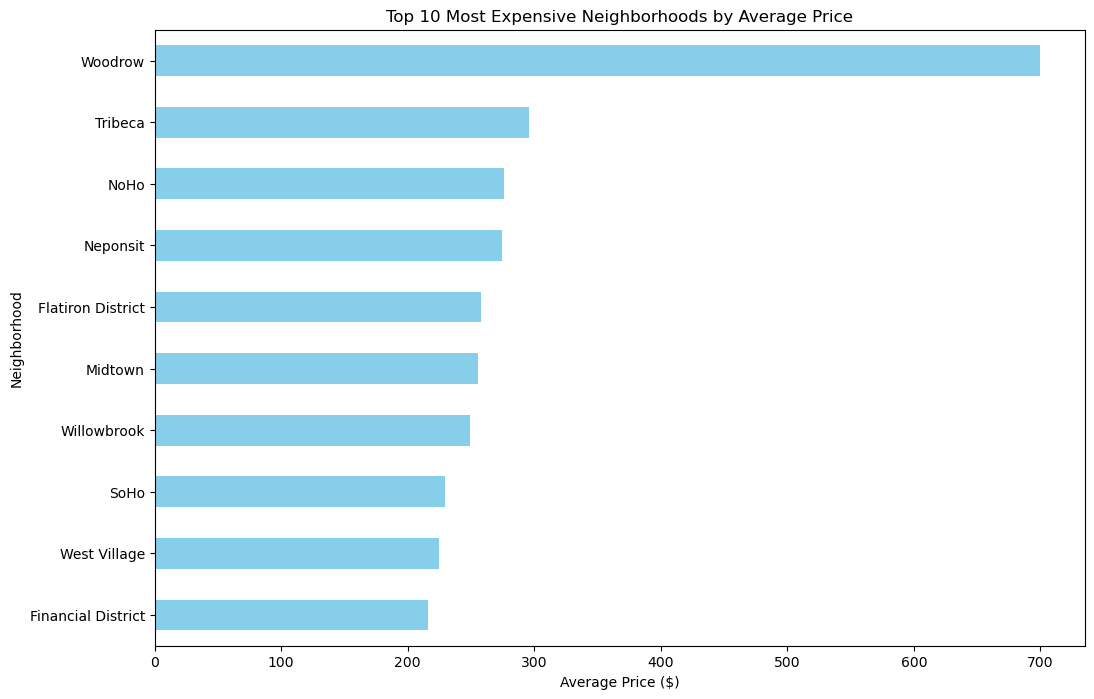

In [21]:
# Group by neighborhood, calculate the mean price for each, and sort them
top_10_expensive_neighborhoods = df_filtered.groupby('neighbourhood')['price'].mean().nlargest(10)

print("Top 10 Most Expensive Neighborhoods:")
print(top_10_expensive_neighborhoods)

# Now, let's visualize this
plt.figure(figsize=(12, 8))
top_10_expensive_neighborhoods.sort_values(ascending=True).plot(kind='barh', color='skyblue')

plt.title('Top 10 Most Expensive Neighborhoods by Average Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')
plt.show()

In [22]:
!pip install folium

In [23]:
import folium

# We'll use a smaller sample to keep the map fast and responsive
df_map_sample = df_filtered.sample(n=500, random_state=42)

# Create a map centered on New York City
# You can get these coordinates from Google Maps
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Add a marker for each listing in our sample
for index, row in df_map_sample.iterrows():
    # Create the popup text that will appear when you click a marker
    popup_text = f"Neighborhood: {row['neighbourhood']}<br>Price: ${row['price']:.2f}"
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        popup=popup_text,
        color='coral',
        fill=True,
        fill_color='red'
    ).add_to(nyc_map)

# Display the map
nyc_map

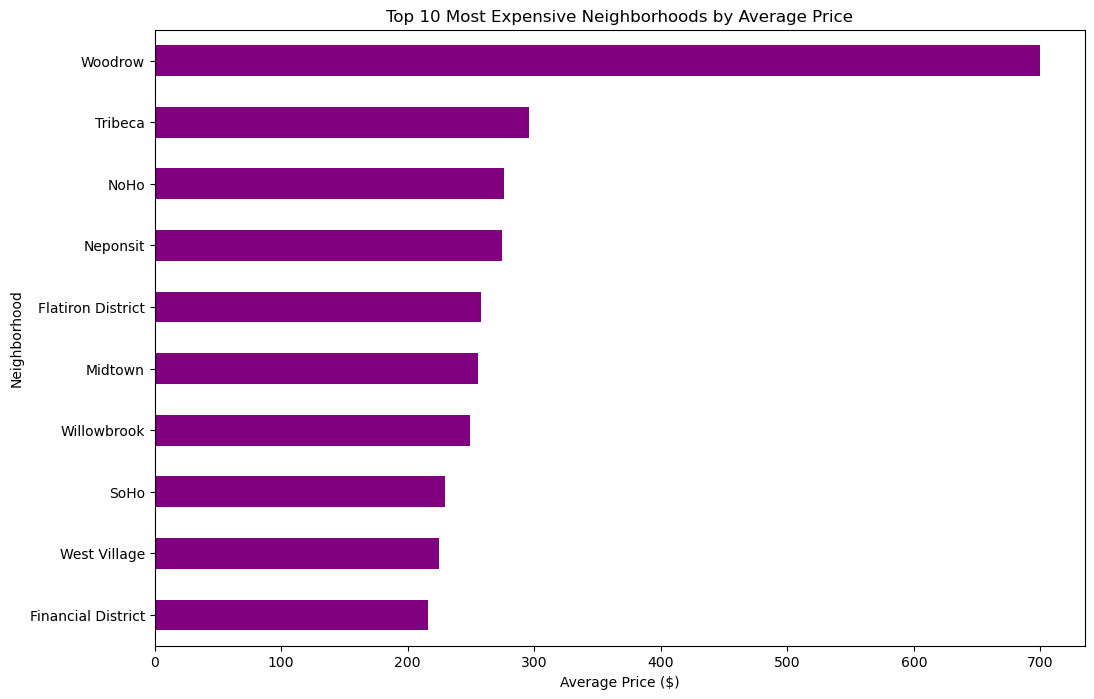

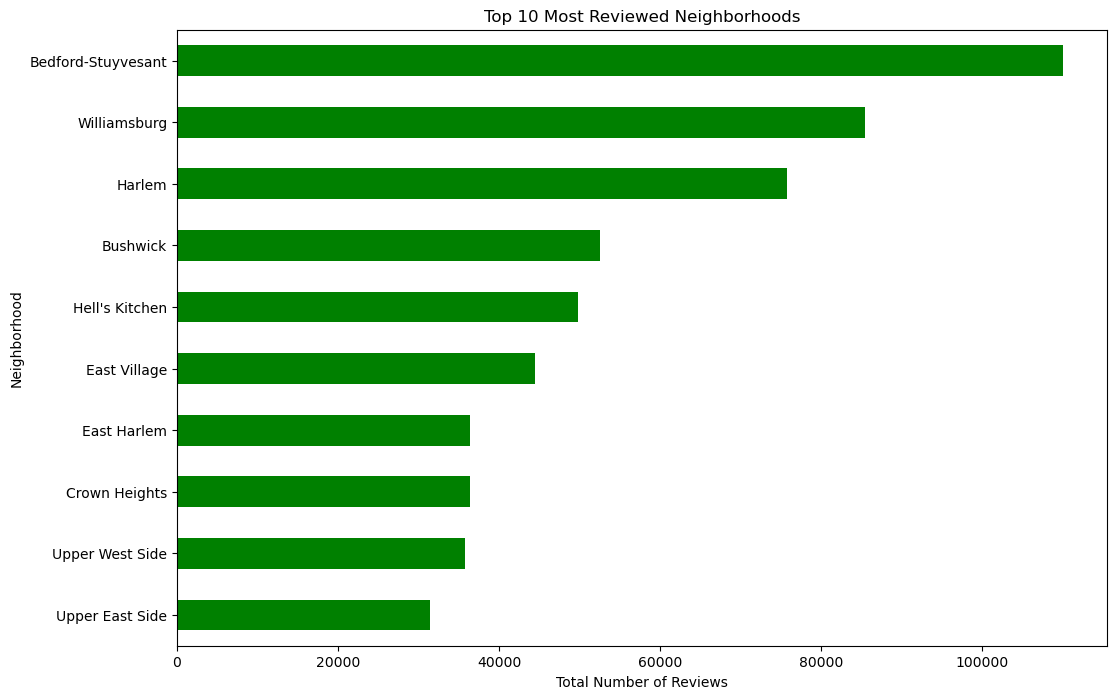

In [24]:
def create_horizontal_barplot(data, title, xlabel, ylabel, color='c'):
    """
    Creates and displays a customized horizontal bar plot.
    
    Args:
        data (pd.Series): The data to plot (e.g., a series of values with index as labels).
        title (str): The title of the plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.
        color (str): The color of the bars.
    """
    plt.figure(figsize=(12, 8))
    data.sort_values(ascending=True).plot(kind='barh', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Now, you can re-create your previous plot with just one line of code!
create_horizontal_barplot(
    data=top_10_expensive_neighborhoods,
    title='Top 10 Most Expensive Neighborhoods by Average Price',
    xlabel='Average Price ($)',
    ylabel='Neighborhood',
    color='purple'
)

# You could do the same for the top 10 most reviewed neighborhoods, etc.
top_10_reviewed = df_filtered.groupby('neighbourhood')['number_of_reviews'].sum().nlargest(10)
create_horizontal_barplot(
    data=top_10_reviewed,
    title='Top 10 Most Reviewed Neighborhoods',
    xlabel='Total Number of Reviews',
    ylabel='Neighborhood',
    color='green'
)

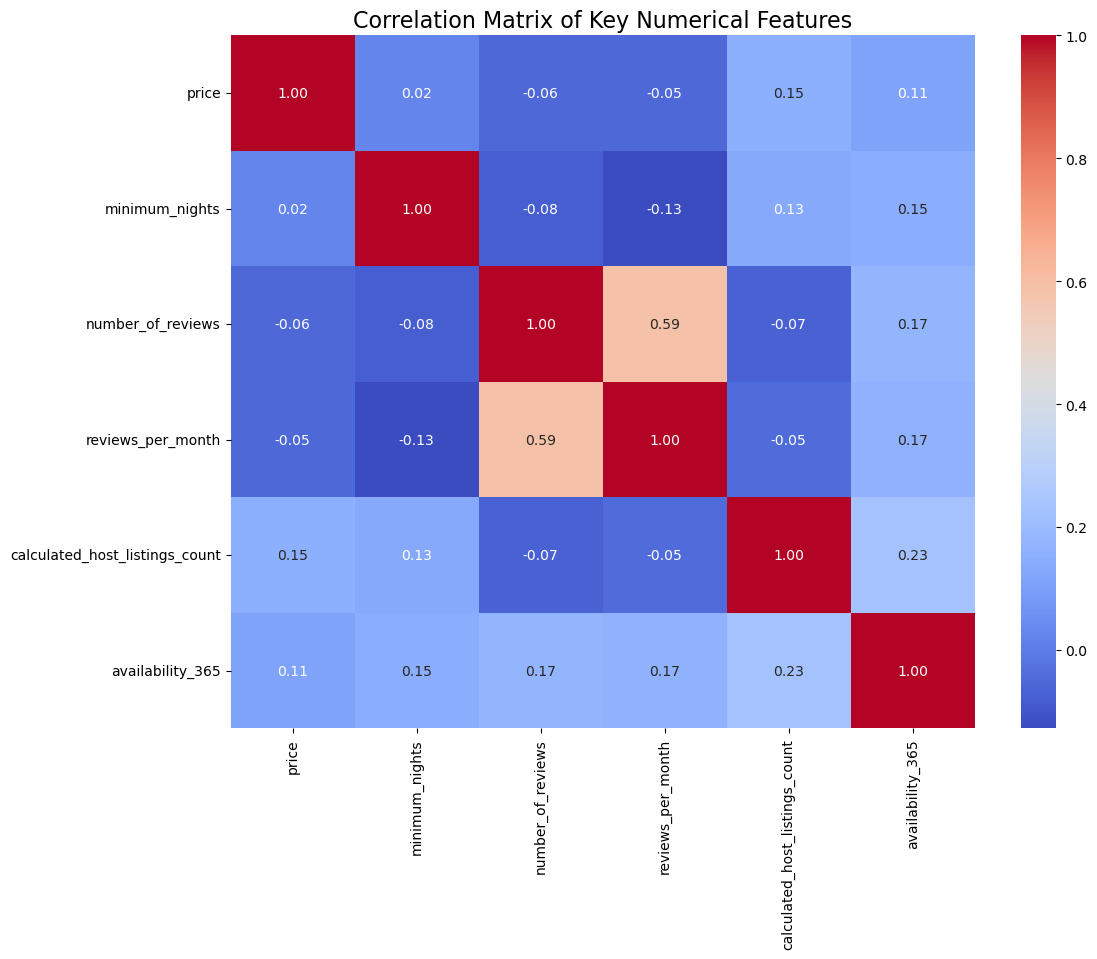

Correlation of features with 'price':
price                             1.000000
calculated_host_listings_count    0.151308
availability_365                  0.113261
minimum_nights                    0.022359
reviews_per_month                -0.053139
number_of_reviews                -0.055588
Name: price, dtype: float64


In [25]:
# --- Correlation Analysis ---
import matplotlib.pyplot as plt
import seaborn as sns

# Select the most relevant numerical columns for a correlation matrix
# We can also include our engineered feature 'days_since_last_review' if you have it
# For now, we'll use the core numerical columns
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
corr_matrix = df_filtered[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(
    corr_matrix,
    annot=True,      # Display the correlation values on the heatmap
    cmap='coolwarm', # Use a color map that clearly shows positive (warm) and negative (cool) correlations
    fmt=".2f"        # Format the annotations to two decimal places
)
plt.title('Correlation Matrix of Key Numerical Features', fontsize=16)
plt.show()

# --- Deeper Dive into Price Correlation ---
print("Correlation of features with 'price':")
price_correlation = corr_matrix['price'].sort_values(ascending=False)
print(price_correlation)

In [26]:
# --- Geospatial Heatmap of Price ---
import folium
from folium.plugins import HeatMap

# Create a base map centered on NYC
nyc_heatmap = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# To prevent a few extreme prices from dominating the map, we'll cap the price for visualization
price_cap = df_filtered['price'].quantile(0.95)
df_heatmap = df_filtered[df_filtered['price'] < price_cap]

# Create the data for the heatmap: a list of [latitude, longitude, price]
heat_data = list(zip(df_heatmap['latitude'], df_heatmap['longitude'], df_heatmap['price']))

# Create and add the HeatMap layer to the base map
HeatMap(
    heat_data,
    radius=10,
    blur=12
).add_to(nyc_heatmap)

# To display in a notebook, you would just call: nyc_heatmap
# To save it to a file that can be shared:
nyc_heatmap.save("nyc_price_heatmap.html")

print("Interactive price heatmap saved to nyc_price_heatmap.html")

Interactive price heatmap saved to nyc_price_heatmap.html


In [27]:
nyc_heatmap

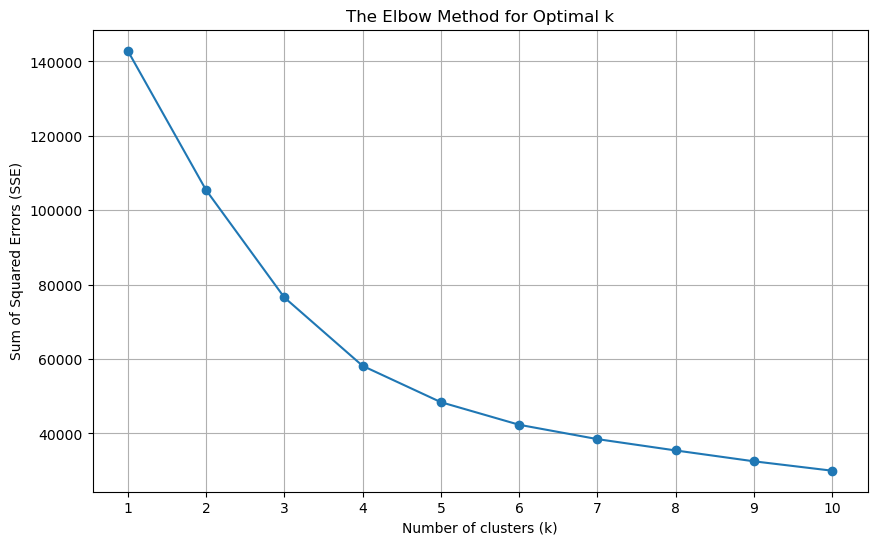

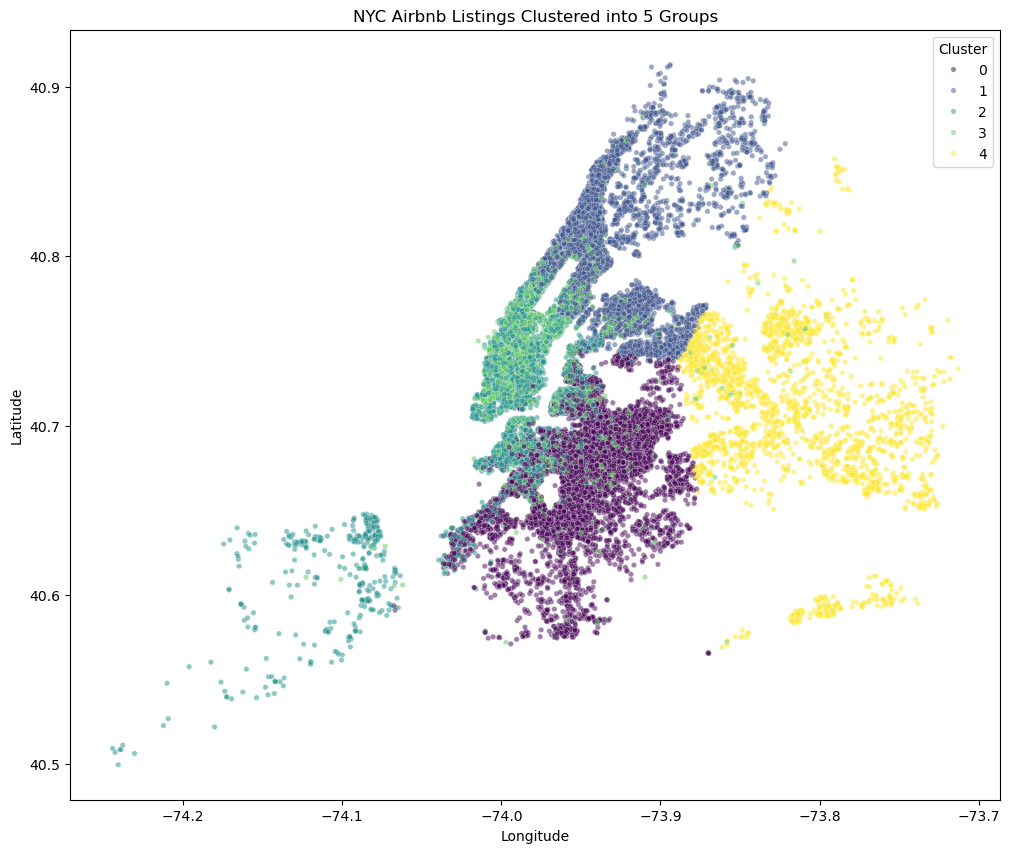

In [28]:
# --- K-Means Clustering ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select Features for Clustering
# We'll cluster based on location (latitude, longitude) and price.
# Let's focus on listings under $500 to avoid extreme prices distorting the clusters.
df_cluster = df_filtered[df_filtered['price'] < 500].copy()
features_for_clustering = ['latitude', 'longitude', 'price']
df_cluster_features = df_cluster[features_for_clustering]

# 2. Scale the Data
# K-Means is sensitive to the scale of numbers. Price (0-500) is much larger than latitude/longitude.
# We must scale them so they have a comparable influence on the clustering.
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_cluster_features)

# 3. Find the Optimal Number of Clusters (The "Elbow Method")
# We'll run K-Means for different numbers of clusters and see which one works best.
# We're looking for an "elbow" point in the plot below.
sse = []  # Sum of squared errors
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to avoid warnings
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('The Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
# From the plot, a good elbow point is often at k=4 or k=5. Let's choose 5.

# 4. Run K-Means with the Chosen Number of Clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['cluster'] = kmeans.fit_predict(features_scaled)

# 5. Visualize the Clusters
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_cluster,
    x='longitude',
    y='latitude',
    hue='cluster', # Color the points by the cluster they belong to
    palette='viridis',
    alpha=0.5,
    s=15 # size of points
)
plt.title(f'NYC Airbnb Listings Clustered into {optimal_k} Groups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


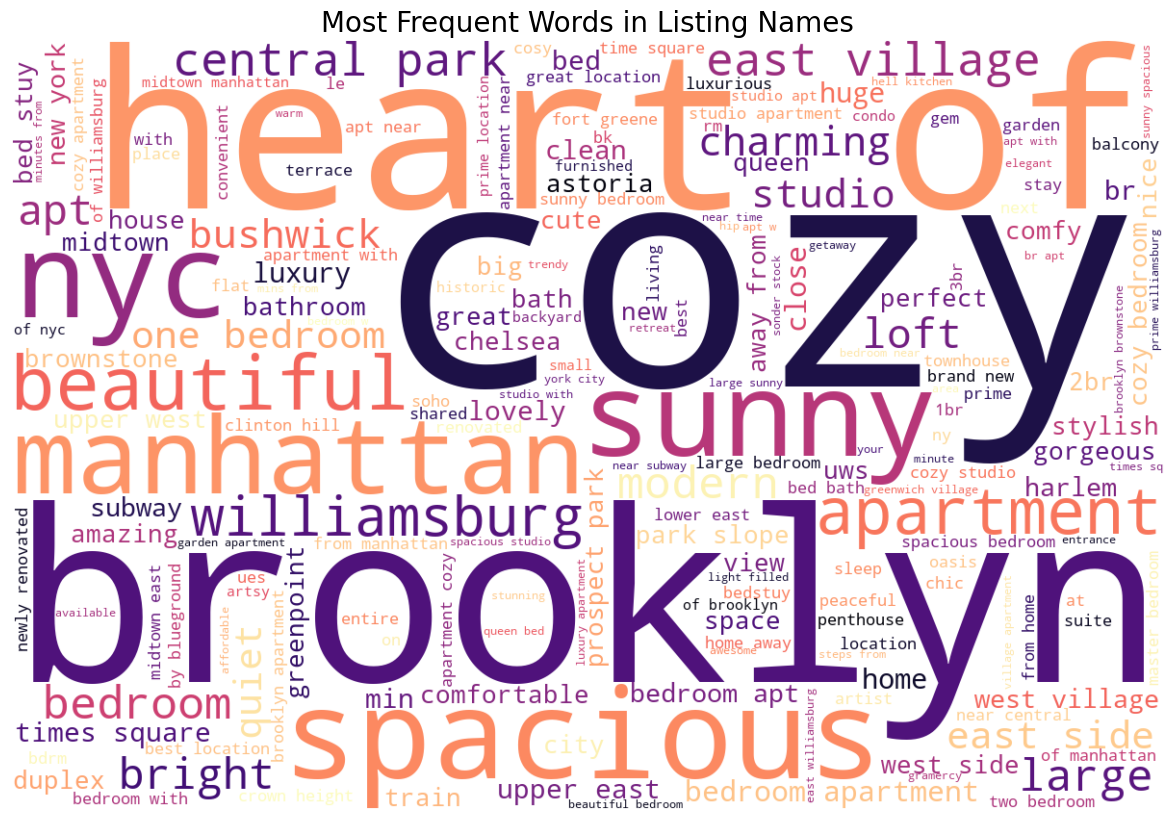

In [30]:
from wordcloud import WordCloud

# 1. Combine all listing names into one big string of text
# We use .dropna() to avoid errors with any missing names
text = ' '.join(str(name).lower() for name in df_filtered['name'].dropna())

# 2. Create a WordCloud object
# The word cloud will automatically handle word frequencies.
# `stopwords` are common words like 'the', 'a', 'in' that we want to ignore.
wordcloud = WordCloud(
    stopwords=set(['room', 'in', 'private', 'the', 'a', 'to', 'and', 'for']), # Add common noise words
    background_color='white',
    width=1200,
    height=800,
    colormap='magma'
).generate(text)

# 3. Display the Word Cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hide the x and y axes
plt.title('Most Frequent Words in Listing Names', fontsize=20)
plt.show()

Top 10 Hosts by Number of Listings:
host_id    host_name        
219517861  Sonder (NYC)         327
107434423  Blueground           232
30283594   Kara                 117
137358866  Kazuya               103
12243051   Sonder                96
16098958   Jeremy & Laura        96
61391963   Corporate Housing     91
22541573   Ken                   87
200380610  Pranjal               65
1475015    Mike                  52
Name: id, dtype: int64


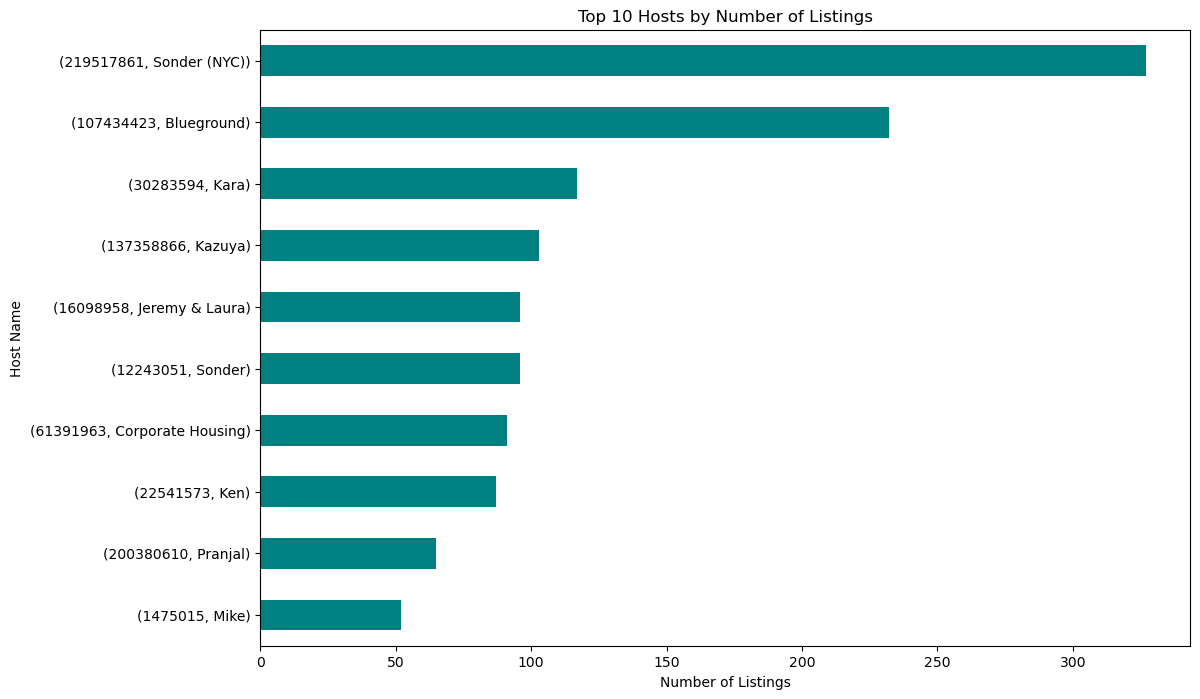

In [31]:
# --- Analysis of Top Hosts ---

# 1. Group by host ID and host name, then count the number of listings for each
top_hosts = df_filtered.groupby(['host_id', 'host_name'])['id'].count().nlargest(10)

print("Top 10 Hosts by Number of Listings:")
print(top_hosts)

# 2. Visualize the results
plt.figure(figsize=(12, 8))
top_hosts.sort_values().plot(kind='barh', color='teal') # Use barh for horizontal bar plot

plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.show()